In [1]:
# Generate the data set

import numpy as np

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

In [2]:
## Normal Equation ##

# Using inv() from numpy's linear algera module (np.linalg)

x_b = np.c_[np.ones((100,1)),x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Actual function used to generate the data => y=4+3x1

theta_best

array([[3.94018018],
       [3.02305841]])

In [3]:
# Make predictions

x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new] # add x0 =1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[3.94018018],
       [9.98629699]])

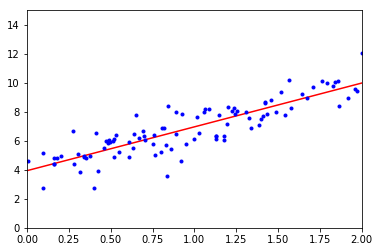

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, 'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94018018]), array([[3.02305841]]))

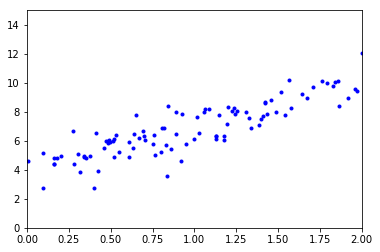

In [6]:
plt.plot(lin_reg.intercept_, lin_reg.coef_, 'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
lin_reg.predict(x_new)

array([[3.94018018],
       [9.98629699]])

In [8]:
# The LinearRegression class is based on the scipy.linalg.lstsq()function which you could call directly

theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.94018018],
       [3.02305841]])

In [9]:
# Use np.linalg.pinv() to compute teh pseudoinverse directly.

np.linalg.pinv(x_b).dot(y)

array([[3.94018018],
       [3.02305841]])

In [10]:
## Gradient Descent ##

# Tweaking parameters iteratively to minimize a cost.

# When using gradient descent make sure all features have similar scale.
# Use Scikit-Learn's StandardScaler

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta # identical to the normal equation

array([[3.94018018],
       [3.02305841]])

In [11]:
## Stochastic Gradient Descent ##

# Stchasctic Gradient Descent (SGD) finds the global minimum by randomly finding points of optimization. 

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initalization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.95013721],
       [3.01168589]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


(array([3.95161479]), array([3.03377586]))

In [13]:
## Mini-batch Gradient Descent ##



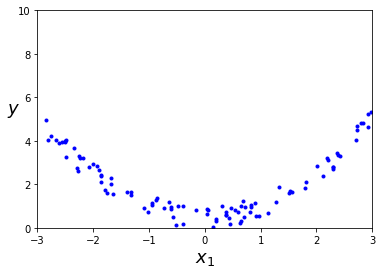

In [14]:
## Polynomial Regression ##

# Using a linear model to fit non-linear data

# Polynomial regression means adding powers to each feature as new features.

# Using a quadratic equation to produce non-linear data.
m = 100
x = 6* np.random.rand(m, 1) - 3
y = 0.5 * x**2 + np.random.rand(m,1)

# plt.plot(x,y,'b.')
# plt.axis([-3,3,0,10])
# plt.show()

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [15]:
# Using Scikit-Learn's PolynomialFeatures class to transform our training data.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([2.38570023])

In [16]:
x_poly[0]

array([2.38570023, 5.69156561])

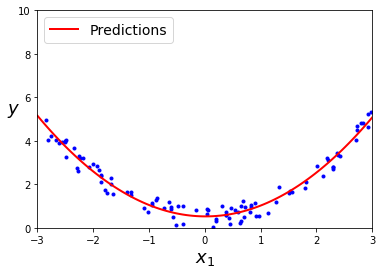

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_


x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

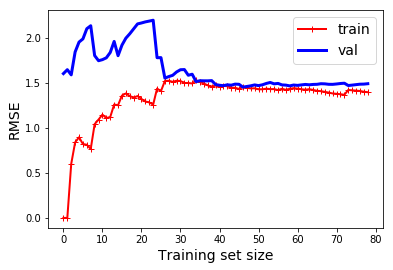

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

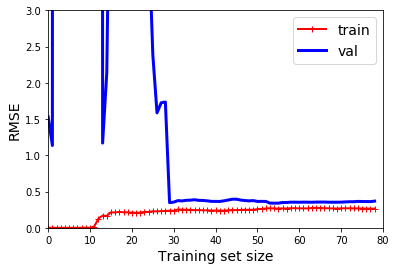

In [20]:
# Learning curves of a 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

# There is a gap between the curves. The model performs better on the training than on the
# validation data.

# The model is overfitting. Use a larger trainging set to bring the curves closer together. 

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3]) 
plt.show()

In [ ]:
## Regularized Linear Models ##

# Good way to reduce overfitting is to regularize the model.
# Linear model regularization achieved by constraining the weights.

In [22]:
# Ridge Regression

# Important to scale the data before using Ridge Regression.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[2.04538082]])

In [24]:
# Penalty hyperparameter sets the type of regularization term to use. 
# Specifying '12' indicates that you want SGD to add a regularization term to the cost function
# equal to half the square of the l2 norm of the weight vector. Simply ridge regression. 

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([2.05212921])

In [25]:
# Lasso Regression
# least . absolute . shrinkage. selection . operator regression (lasso)

# It adds a regularization term to the cost function, but it uses the l1 norm of the weight vector
# instead of half the square of the l2 norm. 

# Lasso eliminates the weights of the least important features (sets them to zero)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([2.04114922])

In [26]:
# Elastic Net

# Middle ground between ridge regression and lasso regression.
# mix ratio r
# r = 0 elasstic net is equivalent to ridge regression.
# r = 1 it is equivalent to lasso regression.

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([2.04114922])

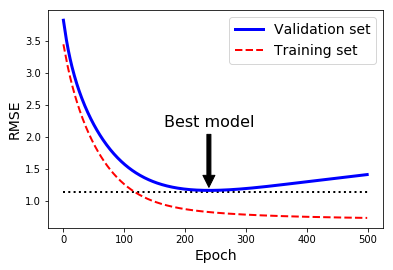

In [35]:
# Early stopping

# After a while the validation error stops to go down which may indicate to stop training. 

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()